# Принятие решений в бизнесе
В нашем распоряжении 9 гипотез.
Необходимо сприоритизировать гипотезы, запустить А/В-тест и проанализировать результаты
## Описание данных
### Данные для первой части
**Файл hypothesis**
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

### Данные для второй части

**Файл orders**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**visitors**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### Часть 1. Приоритизация гипотез.
**Задача**
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2. Анализ A/B-теста.
**Задача**
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.




## Загрузка данных и подготовка их к анализу.

In [1]:
# импортируем библиотеки
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import math

In [2]:
# укажем параметр для отображения всех столбцов
pd.set_option('display.max_columns', 30)

In [3]:
# прочитаем файлы:

try:
    hyp = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    try:
        hyp = pd.read_csv('/datasets/hypothesis.csv')
        orders = pd.read_csv('/datasets/orders.csv')
        visitors = pd.read_csv('/datasets/visitors.csv')
    except:
        hyp = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
        orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
        visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [4]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hyp.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Видим, что названия столбцов начинаются с заглавной буквы

In [6]:
# приведем названия столбцов к нижнему регистур и змеиному написанию столбцов
hyp = hyp.rename(columns=lambda col: col.lower())

hyp.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Видим, что названия 1 и 2 столбца имеют неправильно написание, приведем к змеиному. Столбцы с датой имеют неверный тип данных, нужно поменять на dt.

In [9]:
# скорректируем названия столбцов
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [10]:
# приведем тип данных столбца date
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Видим, что некорректный тип данных в столбце с датой

In [14]:
# приведем тип данных столбца date
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
# проверим на наличие дубликатов
hyp.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

### Вывод

Полученные данные имели следующие недочеты:
* столбцы с датой имеют тип данных object 
* названия столбцов имеют неверное написание

## Часть 1. Приоритизация гипотез.

### Приоритизация фреймворком `ICE`

In [18]:
# посчитаем ICE
hyp['ICE'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']
hyp.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Видим, что сформировался топ-3 гипотез: 8, 0, 7

### Приоритизация фреймворком `RICE`

In [19]:
# посчитаем RICE
hyp['RICE'] = hyp['reach'] * hyp['impact'] * hyp['confidence'] / hyp['efforts']
hyp.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Видим, что тут топ-3/4 отличен от `ICE`: 7, 2, 0/6

### Вывод

Согласно фреймворку `ICE` наиболее перспективные гипотезы: 8, 0, 7, 6
Согласно фреймворку `RICE` наиболее перспективные гипотезы: 7, 2, 0, 6

Согласно боим фреймворкам аутсайдеры: 1, 5, 3, 4

Разница в рейтинге гипотез означает о том, что гипотезы 0, 7, 6 приоритетны, но наименее затратная 7, затем 2, после 0 и 6, но 2 не было в `ICE`, следовательно топ-3 гипотез: 7, 0, 6

## Часть 2. Анализ A/B-теста

In [20]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


### Подготовим данные к анализу

In [21]:
# создадим массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [22]:
# агрегируем данные покупателей по дате заказа
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),axis=1,).sort_values(by=['date', 'group'])

In [23]:
# агрегируем данные посетителей по дате
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visitors' : 'sum',
        }
    ), axis=1).sort_values(by=['date','group'])

In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

### Строим график кумулятивной выручки по группам

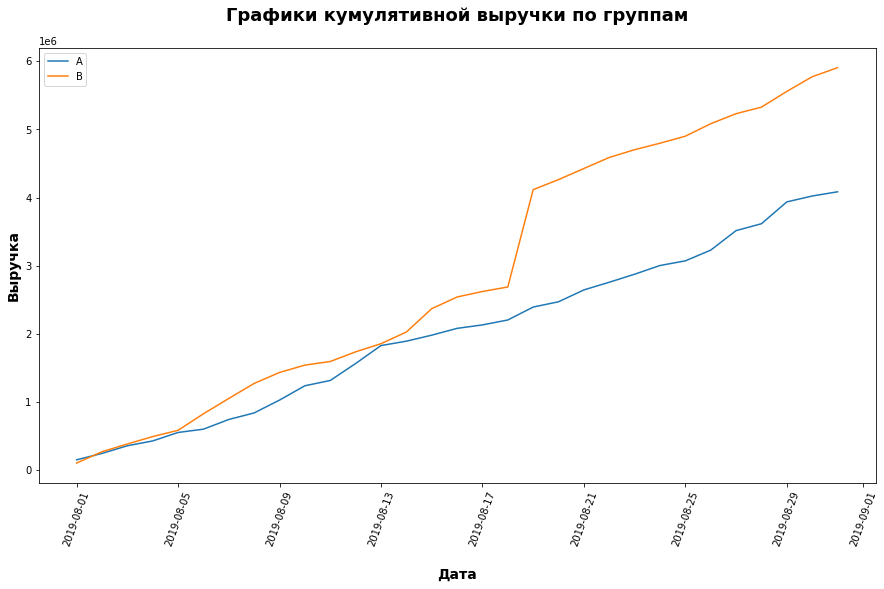

In [26]:
plt.plot(cumulative_revenue_a['date'],
         cumulative_revenue_a['revenue'],
         label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'],
         cumulative_revenue_b['revenue'],
         label='B')
plt.title('Графики кумулятивной выручки по группам\n', fontsize=18, fontweight="bold")
plt.xlabel('\nДата', fontsize=14, fontweight="bold")
plt.ylabel('Выручка', fontsize=14, fontweight="bold")
plt.xticks(rotation=70)
plt.legend()
plt.gcf().set_size_inches(15, 8);

Видим, что на протяжении всего теста группа B лидирует. Резкий скачок, скорей всего, говорит об аномалиях

### Строим график кумулятивного среднего чека по группам

In [27]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

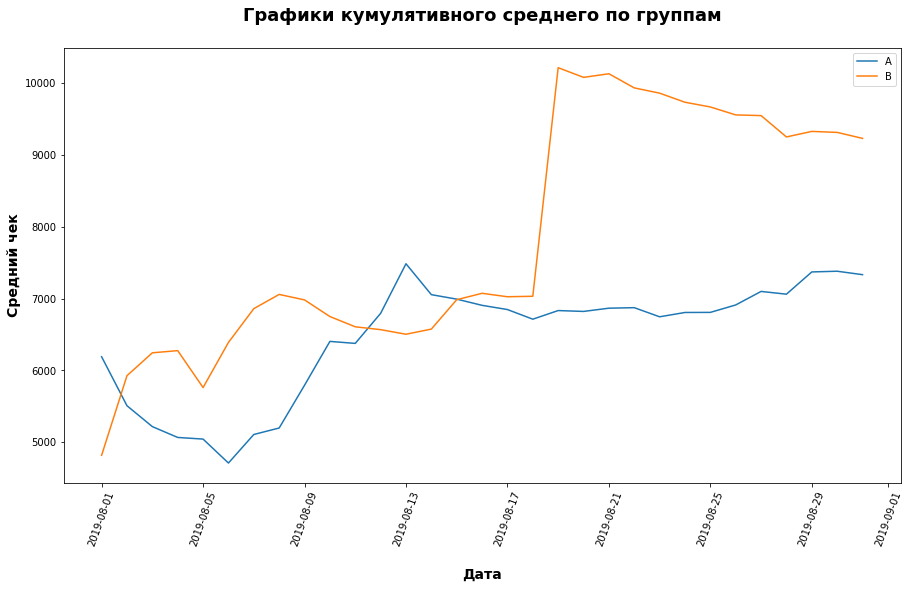

In [28]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Графики кумулятивного среднего по группам\n', fontsize=18, fontweight="bold")
plt.xlabel('\nДата', fontsize=14, fontweight="bold")
plt.ylabel('Средний чек', fontsize=14, fontweight="bold")
plt.legend()
plt.xticks(rotation=70)
plt.gcf().set_size_inches(15, 8);

Видим, что кумулятивное значение среднего чека по группам сперва выше было у А, после чего наблюдается провал с последующим ростом, превышающий группу В, далее наблюдается сильнейший скачок группы В. Следует сделать вывод, что имеется аномалия в данных - сильный выброс

### Строим график относительного изменения кумулятивного среднего чека группы В к группе А

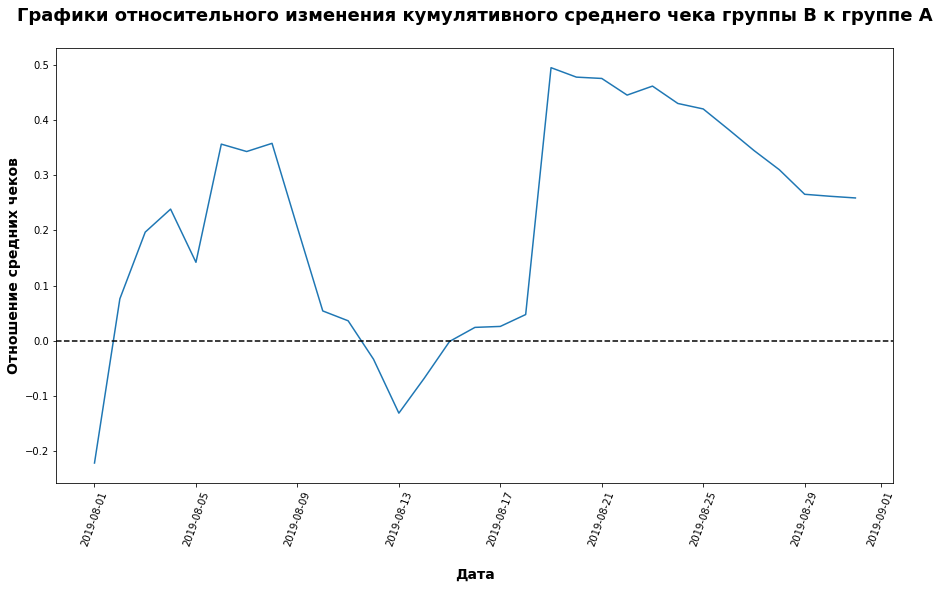

In [29]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Графики относительного изменения кумулятивного среднего чека группы В к группе А\n', fontsize=18, fontweight="bold")
plt.xlabel('\nДата', fontsize=14, fontweight="bold")
plt.ylabel('Отношение средних чеков', fontsize=14, fontweight="bold")
plt.xticks(rotation=70)
plt.gcf().set_size_inches(15, 8);

Видим, что имеются два артефакта: 1)Резкий спад 08.09; 2)Резкий подъем после 17.08. Скорей всего, в этих датах были аномальные покупки

### Строим график кумулятивной конверсии по группам.

In [30]:
# посчитаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [31]:
# сгруппируем данны по группе А 
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# сгруппируем данны по группе B 
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']


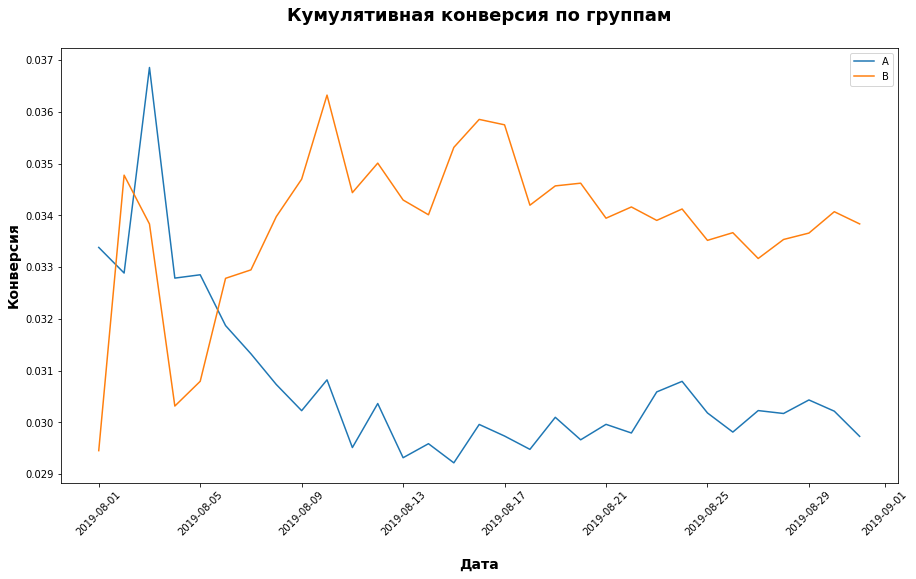

In [32]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам\n", fontsize=18, fontweight="bold")
plt.xlabel('\nДата', fontsize=14, fontweight="bold")
plt.ylabel('Конверсия', fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(15, 8);

Видим, что в начале теста группа А имела большую конверсию, пик 03.08.2019 (конверсия составлял 0,037), после это даты наблюдается сильный спад с последующим уменьшением. Группа В имела также вначале скачок, затем спад и далее скачок до 0,0365

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

In [33]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_conversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


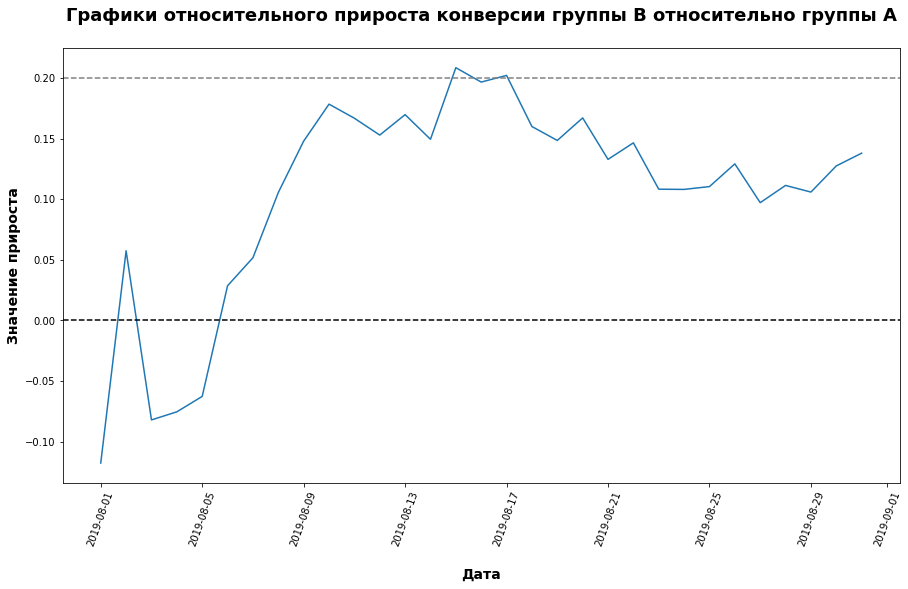

In [34]:
# cтроим отношение конверсий
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1) 
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('Графики относительного прироста конверсии группы B относительно группы A\n', fontsize=18, fontweight="bold")
plt.xlabel('\nДата', fontsize=14, fontweight="bold")
plt.ylabel('Значение прироста', fontsize=14, fontweight="bold")
plt.xticks(rotation=70)
plt.gcf().set_size_inches(15, 8);

Видм, что вначале теста группа В отстовала группы А, но с 01.08 наблюдался рост, после чего спад 03.08 и далее уверенный рост. Начиная с 06.08 группа В начала лидировать

### Строим точечный график количества заказов по пользователям.

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


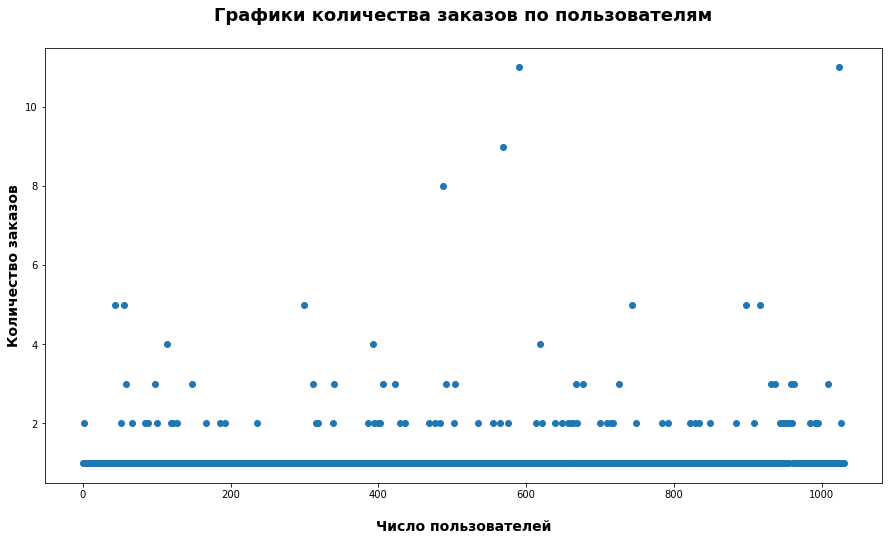

In [35]:
# собираем данные в таблицу
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})

)
orders_by_users.columns = ['visitor_id', 'orders'] # скорректируем названия столбцов

display(orders_by_users.sort_values(by='orders', ascending=False).head()) # выведем на экран таблицу

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Графики количества заказов по пользователям\n', fontsize=18, fontweight="bold")
plt.xlabel('\nЧисло пользователей', fontsize=14, fontweight="bold")
plt.ylabel('Количество заказов', fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(15, 8);

Види, что в основном офрмляют 1 заказ, значительно реже 2, 3 и т.д.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [36]:
# метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Видим, что не более 5% пользователей совершили больше 2-х заказов. И не более 1% пользователей - больше 4-х заказов.
Соответственно, аномальное чилсо заказов - от 4 и выше.

### Постром точечный график стоимостей заказов

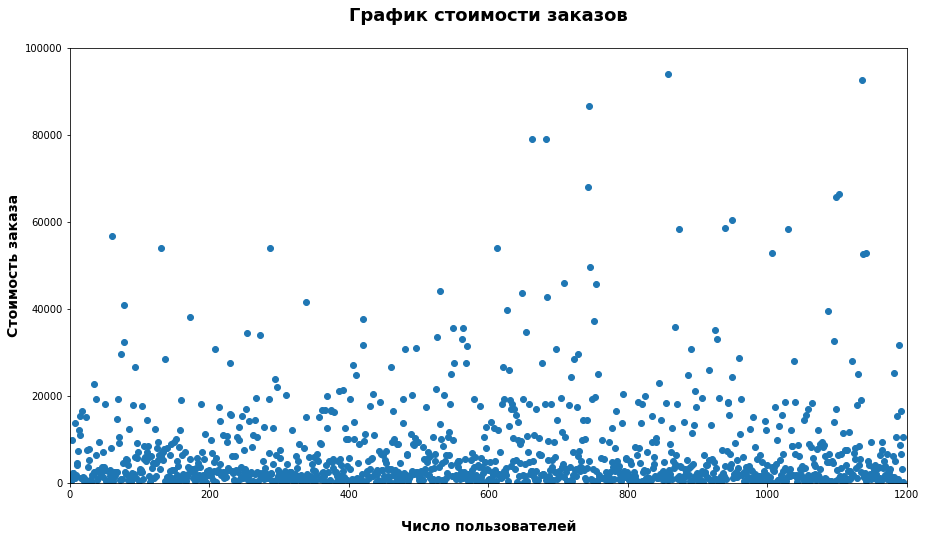

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов\n', fontsize=18, fontweight="bold")
plt.xlabel('\nЧисло пользователей', fontsize=14, fontweight="bold")
plt.ylabel('Стоимость заказа', fontsize=14, fontweight="bold")
plt.axis([0, 1200, 0, 100000]) # скорректируем крайний диапазон осей
plt.gcf().set_size_inches(15, 8);

Видим, что в основном, сумма заказа не превышает 20 000 р.

### Посчитаем 95-й и 99-й перцентили стоимости заказов на пользователя. Выберем границу для определения аномальных заказов.

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Видим, что не более чем у 5% заказов чек дороже 28 000 р. И не больше, чем у 1% заказов - дороже 58 233 р.
Будем считать что аномальная сумма заказа 58 233 р.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [39]:
# сгруппируем и посчитаем екмулятивных пользователей группы А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']
visitors_a_cummulative.head(5)

,date,visitors_cummulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [40]:
# сгруппируем и посчитаем екмулятивных пользователей группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)

visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']
visitors_b_cummulative.head()

,date,visitors_cummulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [41]:
# добавим выручку в группе А
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_a_daily.head()

,date,orders_per_date_a,revenue_per_date_a
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [42]:
# добавим выручку в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

orders_b_daily.head()

,date,orders_per_date_b,revenue_per_date_b
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [43]:
# объединим две таблицы по дате
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [44]:
# создадим таблицы для каждой группы, в которых буду пользователи, совершившие хотя бы один заказ
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

display(orders_by_users_a, orders_by_users_b)

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


Сформулируем гипотезы

Н0 - различия в конверсиях между группами по «сырым» данным статистически не значимы

Н1 - различия в конверсиях между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 5%.

In [45]:
# бъявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
# А пользователям без заказов — нули.

sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)


In [46]:
# посчитаем статистическую значимость различия конверсии тестом Манна-Уитни
print("{0:.5f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

0.01679


Видим, что p-value мене 0,05, соответственно нулевую гипотезу отвергаем. То есть в конверсии между группами есть статистически значимые различия. Что в свое очередь теребует от нас удаление выбросов

In [47]:
# посчитаем относительный прирост
print("{0:.3f}".format((sample_b.mean()/sample_a.mean())-1))

0.138


Видим, что относительный прирост конверсии группы B к А составил 13,8%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 5%.

In [48]:
# выделим столбцы с выручкой по каждой из групп
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

In [49]:
print("{0:.5f}".format(st.mannwhitneyu(revenue_a, revenue_b)[1]))

0.72929


Видим, что p-value значительно больше 0,05, соответственно нулевую гипотезу не отвергаем. То есть имеются незначительные различия в среднем чеке между групп

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным

In [50]:
# "очистим" данные с помощью среза
# соберем пользователей с 4-мя заказами, т.к. считаем их аномальными
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 3]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)

# соберем заказы более 30000 р., т.к. считаем их аномальными
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

In [51]:
# объединим таблицы, отсортируем, удалим дубликаты
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64


In [52]:
# исключим аномальных пользователей

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы

Н0 - различия в конверсии между группами по «очищенным» данным статистически не значимы

Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 5%.

In [53]:
# посчитаем статистическую значимость

print('{0:.5f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

0.01832


Видим, что p-value менее 0,05, следовательно отвергаем нулевую гипотезу.

In [54]:
print('{0:.3f}'.format((sample_b_filtered.mean()/sample_a_filtered.mean()-1)))

0.148


Видим, что относительный прирост увеличился, на 1%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [55]:
#отфильтруем аномальных пользователей
sample_a_filtered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

sample_b_filtered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 5%.

In [56]:
print('{0:.5f}'.format(st.mannwhitneyu(sample_a_filtered_revenue, sample_b_filtered_revenue)[1]))

0.95832


Видим, что p-value больше 0,05, следовательно нулевую гипотезу отвергнуть не удается

In [57]:
print('{0:.3f}'.format((sample_b_filtered_revenue.mean()/sample_a_filtered_revenue.mean()-1)))

-0.020


Прирост среднего чека группы В к А снизился до -0,02

### Примите решение по результатам теста и объясните его.

По полученным данным можно сделать вывод: по среднему чеку статистической значимости нет, но группа В статистически значима группы А в конверсии, соответственно победа группы В. Это обсуловлено тем, что чем выше конверсия, тем больше объем пользователей, что в свою очередь увеличит количество заказов. В данном случае на среднюю выручку обращать внимания не стоит, т.к. средний чек может остаться таким же(условно, что у 5000 пользователей, что у 8000 пользователей).Тест нужно остановить.

## Вывод

По результатам исследования приоретизация гипотез выявлены следующие лидеры в соответствии с фреймворком: `ICE` - гипотеза №8, `RICE` - гипотеза №7.

Кумулятивная выручка в течение всего период наблюдался рост выручки группы В, но видим, резкий скачок в середине августа, что свидетельствует, скорей всего, о большом числе заказов или о дорогих заказах.

Выявили аномальное число заказов на кажого человека составляет 4, а аномальная стоимость заказа превышает 30 000 р.

Изучили статистическую значимость различий в среднем чере и конверсии по "сырым" и "чистым" данным, выявили:
* по "сырым" данным относительный прирост конверсии группы В к конверсии кгруппы А составил 13,8 %, статистически значимых различий в среднем чеке нет
* по "чистым" данным относительный прирост конверсии группы В к конверсии группы А составил 14,8%, статистически значимых различий в среднем чеке также не выявлено

Итого: тест необходимо остановить. Победа группы В, т.к. конверсия больше, что в свою очередь увеличивыает прибыль.